In [1]:
from Helpers import *

In [73]:
def f(x):
    C = np.array([-x[3]*(2*x[2]+x[3])*a2*np.sin(x[1]),x[2]*x[2]*a2*np.sin(x[1])])
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    theta = Minv@(-Bdyn@x[2:4]-C)
    return np.array([x[2],x[3],theta[0],theta[1]])
def g(x):
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    G = np.zeros((4,2))
    G[2:,] = Minv
    return G
def A(x,w):return np.array([[w,0,1,0],[0,w,0,1]])
def e(x,v,w):
    return A(x,w)@x+v

def fe(x,w):
    return A(x,w)@f(x)
def ge(x,w):return A(x,w)@g(x)
def Geinv(x,w):return np.linalg.inv(ge(x,w))
def u(edot,x,w):
    return (Geinv(x,w)@(edot-fe(x,w)))   


In [55]:
def ToCartesian(x):
    if len(x.shape) == 1 : 
        s = x[0]
        e = x[1]
    else : 
        s = x[:,0]
        e = x[:,1]
    X = np.cos(s+e)*33+np.cos(s)*30
    Y = np.sin(s+e)*33+np.sin(s)*30

    return X,Y

[0.07406768 0.14813536]
[0.06959554 0.13919109]
[0.06512341 0.13024682]
[0.06065127 0.12130255]
[0.05617914 0.11235827]
[0.051707 0.103414]
[0.04723486 0.09446973]
[0.04276273 0.08552546]
[0.03829059 0.07658119]
[0.03381846 0.06763691]
[0.02934632 0.05869264]
[0.02487418 0.04974837]
[0.02040205 0.0408041 ]
[0.01592991 0.03185983]
[0.01145778 0.02291555]
[0.00698564 0.01397128]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.00502701]
[-0.00195863 -0.00391726]
[0.00251351 0.005027

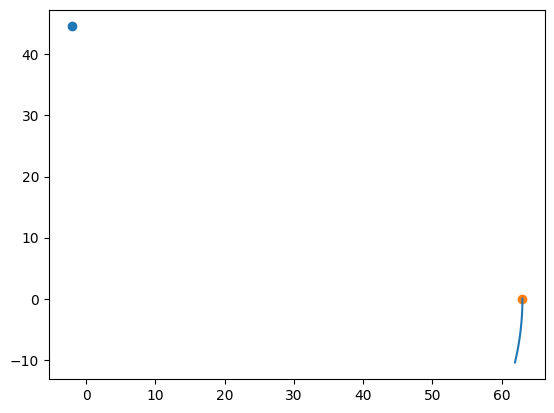

In [112]:
K = 120
dt = .01
x = np.array([0.0,0.0,0.0,0.0])
w = .1
v = np.array([pi/4,pi/2])*w
array_x = np.zeros((K,4))
array_x[0] = np.copy(x)
for i in range(K-1):
    edot = -e(x,v,w)/np.linalg.norm(e(x,v,w),ord = 2)
    x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(4))
    array_x[i+1] = x
    print(e(x,v,w))
X,Y = ToCartesian(array_x)
plt.plot(X,Y)
X,Y = ToCartesian(v/w)
plt.scatter(X,Y)
X,Y = ToCartesian(np.array([0,0]))
plt.scatter(X,Y)